In [147]:
print("hi")

hi


In [148]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [149]:
Data=pd.read_csv("winequality-red.csv")

In [150]:
Data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [151]:
Data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [152]:
Data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [153]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [154]:
Data.shape

(1599, 12)

In [155]:
Data["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

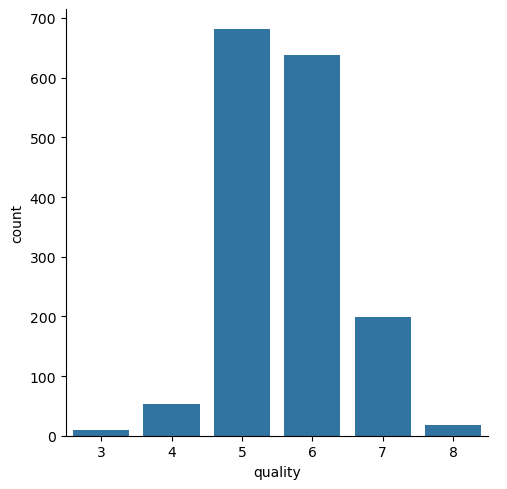

In [156]:
#number of values for each quality
sns.catplot(x="quality", data=Data,kind="count")

In [157]:
# volatile acidity vs quality   

<Axes: xlabel='quality', ylabel='volatile acidity'>

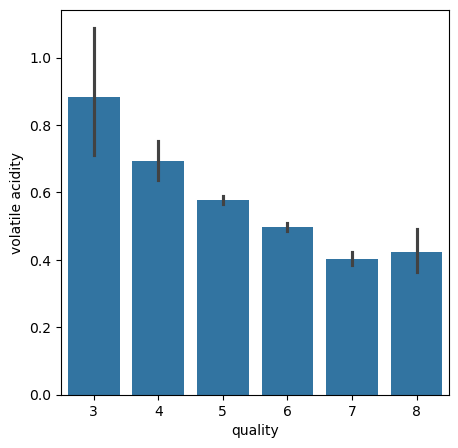

In [158]:
plot= plt.figure(figsize=(5,5))
sns.barplot(x="quality", y="volatile acidity", data=Data )

In [159]:
#this shows that both are inversaly proportional

<Axes: xlabel='quality', ylabel='citric acid'>

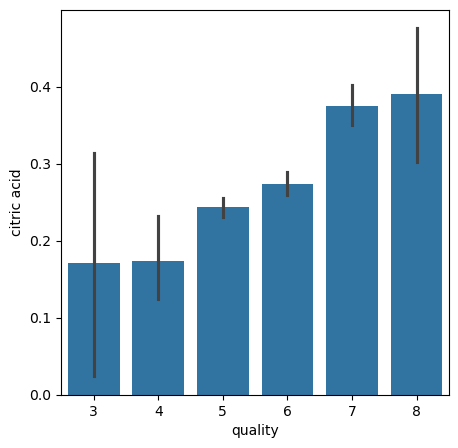

In [160]:
plot= plt.figure(figsize=(5,5))
sns.barplot(x="quality", y="citric acid", data=Data )

In [161]:
#they are directly proportinal 

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

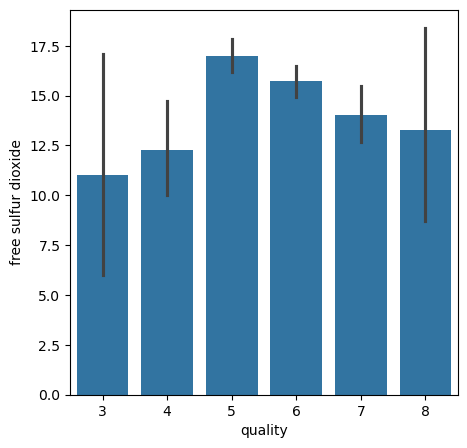

In [162]:
plot= plt.figure(figsize=(5,5))
sns.barplot(x="quality", y="free sulfur dioxide", data=Data )

In [163]:
#now its time to find the correlation of all the column 

#there are 2 type of correlation
#1. positive directly proportional 
# 2. negative indirectly poroportional


In [164]:
corelation=Data.corr()

In [165]:
#constructing a heat map to understand the co_realtion between the columns 

<Axes: >

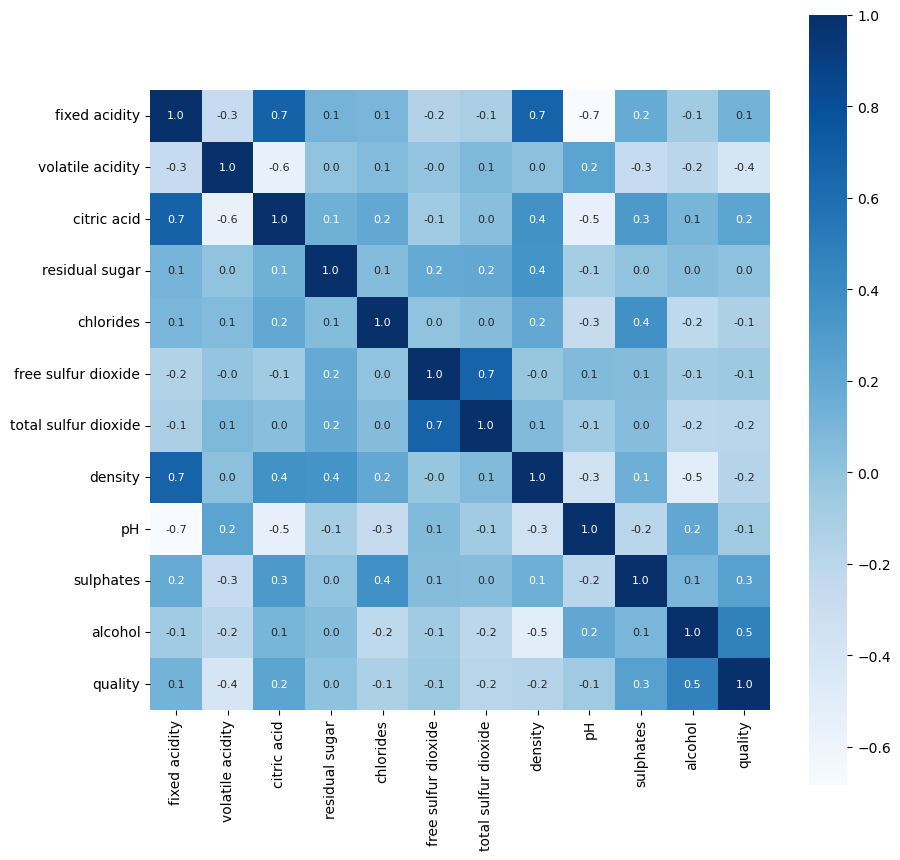

In [166]:
plt.figure(figsize=(10,10))
sns.heatmap(corelation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8}, cmap="Blues")
# cbar is color bar, fmt is how many floating value we need, square is in we want everything is in the square block, annot is label, annot_kws size of lebel, and blue is color

In [167]:
X=Data.drop("quality",axis=1)

In [168]:
#label binarization
#this is basically ab label binarization, we are deviding the label into 2 part, if it is good, then it is above 7 else it is bad quality

In [169]:
Y=Data["quality"].apply(lambda y_val:1 if y_val>=7 else 0)

In [170]:
Y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [171]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=3)

In [172]:
X_train.shape

(1279, 11)

In [173]:
X_test.shape

(320, 11)

In [174]:
Model=RandomForestClassifier()

In [175]:
Model.fit(X_train,Y_train)

RandomForestClassifier()

In [176]:
trainig_pred=Model.predict(X_train)

accuracy_score(trainig_pred,Y_train)

1.0

In [177]:
test_pred=Model.predict(X_test)

accuracy_score(test_pred,Y_test)

0.90625

In [188]:
input_data=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

val=np.asarray(input_data)
val

array([ 7.3   ,  0.65  ,  0.    ,  1.2   ,  0.065 , 15.    , 21.    ,
        0.9946,  3.39  ,  0.47  , 10.    ])

In [189]:
asnwer=val.reshape(1,-1)
#this tells us that we are predicting for one instance only, if we don't say that, model will think we are predicting for every value

In [190]:
ans=Model.predict(asnwer)
ans
if ans[0] ==0:
    print("bad quality")
else:
    print("good quality")


good quality


d:\conda\envs\trainy2_O\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [191]:
print(ans)

[1]


SVM


In [182]:
Model1=SVC()

In [183]:
Model1.fit(X_train,Y_train)

SVC()

In [184]:
trainig_pred1=Model1.predict(X_train)

accuracy_score(trainig_pred1,Y_train)

0.8639562157935887

In [185]:
test_pred1=Model1.predict(X_test)

accuracy_score(test_pred1,Y_test)

0.865625

In [186]:
ans1=Model1.predict(asnwer)
ans1
if ans1[0]==0:
    print("bad quality")
else:
    print("good quality")

bad quality


d:\conda\envs\trainy2_O\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [187]:
ans1

array([0], dtype=int64)